<h2>San Francisco Metrosu BART projesi</h2>
Burada hangi istasyondan en fazla yolcu taşındığını ve günün hangi saatinde yolculuk yaparsanız en koltukta oturarak yolculuk yapabileceğinizi hesaplayacaksınız. ve aşağıdaki sorulara cevap vereceksiniz


**_Data Analytics Questions_**<br>
Which BART station is the busiest?<br>
What is the least popular BART route?<br>
When is the best time to go to SF from Berkeley if you want to find a seat?<br>
Which day of the week is the busiest?<br>
How many people take the BART late at night?<br>

**_Data Science Questions_**<br>
Question A: Compute the straight line distance between every station<br>
Question B: Build a model that can predicted the number of people commuting to work by Bart between any 2 stations:<br>
How would you approach that?<br>
What additional data would you need?<br>
How would you want the city or Bart officials to use your data?<br>

**_Data Preparation_**<br>
Append the two ridership files for 2016 and 2017<br>
Merge the station data file<br>
Answer data analytics questions<br>

In [1]:
#import standard libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)
import warnings
warnings.filterwarnings("ignore")

-- A Map of the BART System for Visualization --

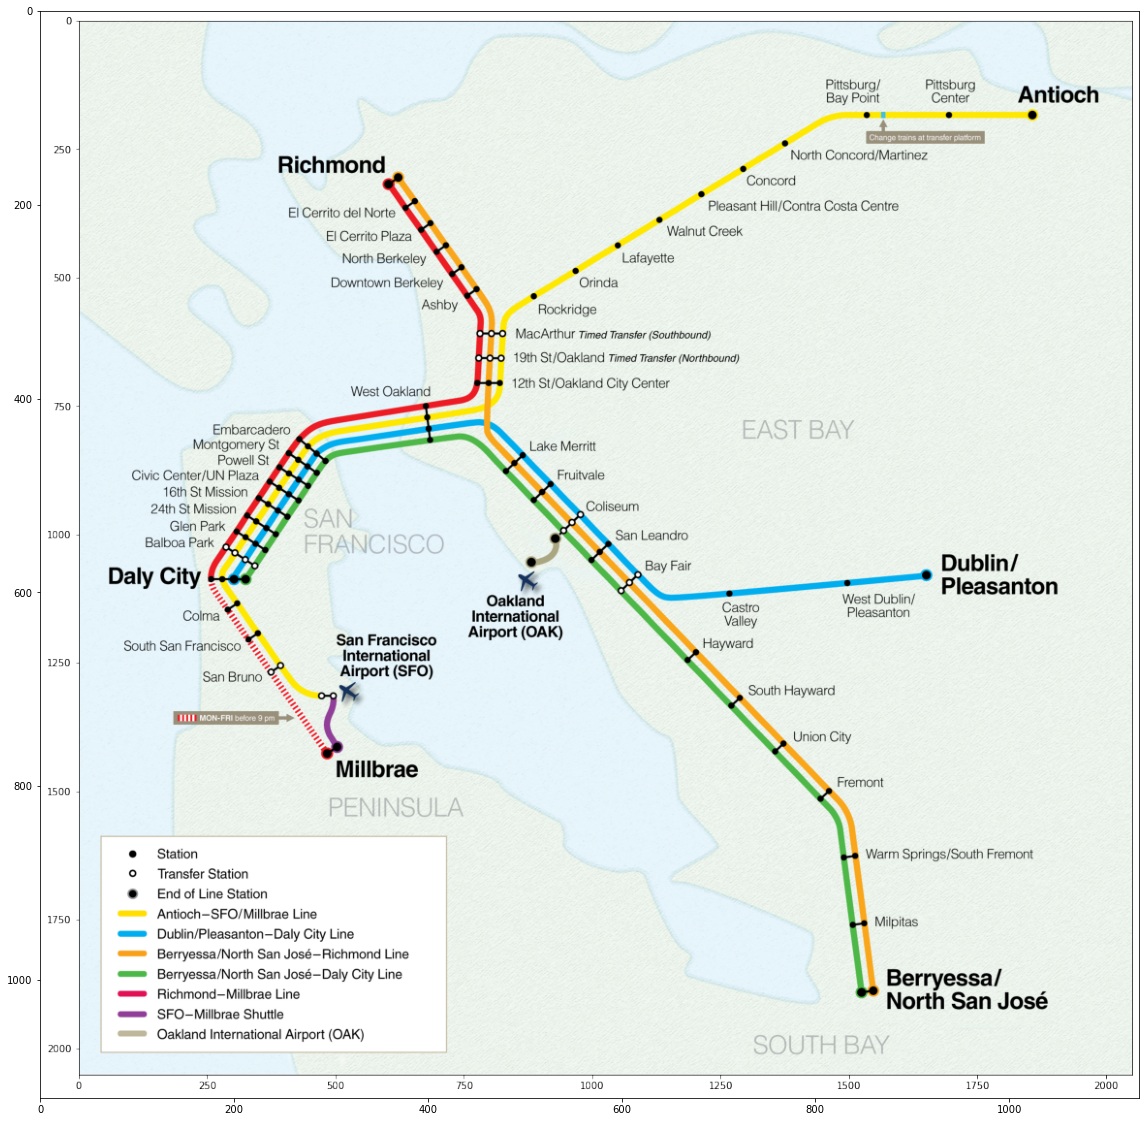

In [2]:
plt.figure(figsize=(20,20))
img = plt.imread('BARTSystemMapAPI.png')
plt.imshow(img)
plt.show()

First lets see our data and get knowledge about their values

In [3]:
#dataset of 2020
df=pd.read_csv("date-hour-soo-dest-2020.csv")

In [4]:
df.head()

Date  Hour Origin Station Destination Station  Trip Count
0  2020-01-01     0           12TH                16TH           5
1  2020-01-01     0           12TH                24TH           3
2  2020-01-01     0           12TH                ASHB           6
3  2020-01-01     0           12TH                BAYF           1
4  2020-01-01     0           12TH                CIVC           3

In [5]:
df.tail()

Date  Hour Origin Station Destination Station  Trip Count
5811858  2020-12-31    23           FRMT                BERY           1
5811859  2020-12-31    23           FRMT                MLPT           1
5811860  2020-12-31    23           MCAR                ANTC           1
5811861  2020-12-31    23           MLBR                MLBR           1
5811862  2020-12-31    23           POWL                BERY           1

In [6]:
df.shape

(5811863, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811863 entries, 0 to 5811862
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Date                 object
 1   Hour                 int64 
 2   Origin Station       object
 3   Destination Station  object
 4   Trip Count           int64 
dtypes: int64(2), object(3)
memory usage: 221.7+ MB


In [8]:
df.describe()

Hour    Trip Count
count  5.811863e+06  5.811863e+06
mean   1.352784e+01  5.407264e+00
std    4.925962e+00  1.811828e+01
min    0.000000e+00  1.000000e+00
25%    9.000000e+00  1.000000e+00
50%    1.400000e+01  2.000000e+00
75%    1.800000e+01  4.000000e+00
max    2.300000e+01  9.250000e+02

In [9]:
df.corr()

Hour  Trip Count
Hour        1.000000   -0.017611
Trip Count -0.017611    1.000000

In [10]:
df.isnull().sum()

Date                   0
Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
dtype: int64

In [11]:
df.sample(5)

Date  Hour Origin Station Destination Station  Trip Count
4265664  2020-09-17     8           PHIL                GLEN           2
2947504  2020-06-16     7           CIVC                FTVL           2
4691752  2020-10-15    12           SBRN                COLM           1
3168233  2020-07-01    15           WCRK                MONT           1
1143925  2020-02-13    14           PHIL                EMBR          16

In [12]:
df["Date"]=pd.to_datetime(df["Date"])

In [13]:
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
df["Weekday"]=df["Date"].dt.day_name()
del df["Date"]

In [14]:
#Clean the "Date" column
#df["Year"] = df["Date"].astype(str).str[:4].astype(int)
#df["Month"] = df["Date"].astype(str).str[5:7].astype(int)
#df["Day"] = df["Date"].astype(str).str[8:10].astype(int)
#del df["Date"]

In [15]:
df.sample(3)

Hour Origin Station Destination Station  Trip Count  Year  Month  \
173649     22           DBRK                SANL           1  2020      1   
4646233    17           LAFY                MCAR           1  2020     10   
1389384    21           ORIN                16TH           2  2020      2   

         Day  Weekday  
173649     7  Tuesday  
4646233   12   Monday  
1389384   23   Sunday

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811863 entries, 0 to 5811862
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Hour                 int64 
 1   Origin Station       object
 2   Destination Station  object
 3   Trip Count           int64 
 4   Year                 int64 
 5   Month                int64 
 6   Day                  int64 
 7   Weekday              object
dtypes: int64(5), object(3)
memory usage: 354.7+ MB


In [17]:
df.describe()

Hour    Trip Count       Year         Month           Day
count  5.811863e+06  5.811863e+06  5811863.0  5.811863e+06  5.811863e+06
mean   1.352784e+01  5.407264e+00     2020.0  5.936740e+00  1.537081e+01
std    4.925962e+00  1.811828e+01        0.0  3.676376e+00  8.805219e+00
min    0.000000e+00  1.000000e+00     2020.0  1.000000e+00  1.000000e+00
25%    9.000000e+00  1.000000e+00     2020.0  2.000000e+00  8.000000e+00
50%    1.400000e+01  2.000000e+00     2020.0  6.000000e+00  1.500000e+01
75%    1.800000e+01  4.000000e+00     2020.0  9.000000e+00  2.300000e+01
max    2.300000e+01  9.250000e+02     2020.0  1.200000e+01  3.100000e+01

In [18]:
df.corr()

Hour  Trip Count  Year     Month       Day
Hour        1.000000   -0.017611   NaN -0.018326 -0.001590
Trip Count -0.017611    1.000000   NaN -0.165873 -0.016879
Year             NaN         NaN   NaN       NaN       NaN
Month      -0.018326   -0.165873   NaN  1.000000  0.028390
Day        -0.001590   -0.016879   NaN  0.028390  1.000000

In [19]:
# get the station names from the excel table
df_station_names=pd.read_excel("Station_Names.xls")

In [20]:
del df_station_names["Unnamed: 0"]
df_station_names

Two-Letter Station Code                         Station Name
0                       RM                             Richmond
1                       EN                 El Cerrito Del Norte
2                       EP                     El Cerrito Plaza
3                       NB                       North Berkeley
4                       BK                             Berkeley
5                       AS                                Ashby
6                       MA                            MacArthur
7                       19                  19th Street Oakland
8                       12    12th Street / Oakland City Center
9                       LM                         Lake Merritt
10                      FV                            Fruitvale
11                      CL                             Coliseum
12                      SL                          San Leandro
13                      BF                              Bayfair
14                      HY                              Hayward
15                      SH                        South Hayward
16                      UC                           Union City
17                      FM                              Fremont
18                      CN                              Concord
19                      PH                        Pleasant Hill
20                      WC                         Walnut Creek
21                      LF                            Lafayette
22                      OR                               Orinda
23                      RR                            Rockridge
24                      OW                         West Oakland
25                      EM                          Embarcadero
26                      MT                    Montgomery Street
27                      PL                        Powell Street
28                      CC                         Civic Center
29                      16                  16th Street Mission
30                      24                  24th Street Mission
31                      GP                            Glen Park
32                      BP                          Balboa Park
33                      DC                            Daly City
34                      CM                                Colma
35                      CV                        Castro Valley
36                      ED                    Dublin/Pleasanton
37                      NC                        North Concord
38                      WP                  Pittsburg/Bay Point
39                      SS                  South San Francisco
40                      SB                            San Bruno
41                      SO  San Francisco International Airport
42                      MB                             Millbrae
43                      WD               West Dublin/Pleasanton
44                      OA        Oakland International Airport
45                      WS                         Warm Springs
46                      AN                              Antioch
47                      PC                     Pittsburg Center
48                      ML                             Milpitas
49                      BE           Berryessa / North San José

In [21]:
df["Origin Station"].unique(), df["Origin Station"].nunique()

(array(['12TH', '16TH', '19TH', '24TH', 'ANTC', 'ASHB', 'BALB', 'BAYF',
        'CAST', 'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN',
        'DUBL', 'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE',
        'MCAR', 'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PCTR',
        'PHIL', 'PITT', 'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN',
        'SFIA', 'SHAY', 'SSAN', 'UCTY', 'WARM', 'WCRK', 'WDUB', 'WOAK',
        'BERY', 'MLPT'], dtype=object),
 50)

<font color=darkgreen>
<h3>Data Analytics Questions</h3></font>

**Q: Which BART station is the busiest?**

In [22]:
df["Origin Station"].value_counts(ascending=False).to_frame()
#station_count = df.groupby("Origin Station")["Trip Count"].count() -this does the same thing, not needed

Origin Station
POWL          228578
CIVC          219160
EMBR          206637
MONT          202319
16TH          183182
FTVL          176850
24TH          173518
12TH          169909
MCAR          158738
19TH          157526
COLS          154693
DELN          146136
DBRK          145980
SANL          144048
LAKE          138577
SFIA          137165
BAYF          136738
BALB          135481
DALY          133553
RICH          131998
CONC          124987
WOAK          124582
HAYW          122973
GLEN          119373
ASHB          106501
DUBL          105822
WCRK          104990
PITT          101765
FRMT          100394
SHAY           97713
UCTY           97641
PHIL           97518
PLZA           96762
ANTC           90682
SBRN           88266
ROCK           87151
NBRK           85352
COLM           83711
MLBR           81410
WARM           79171
SSAN           73856
CAST           67659
WDUB           62707
PCTR           61970
LAFY           58445
OAKL           51445
ORIN           51012
NCON           49385
BERY           33044
MLPT           24790

In [23]:
df.groupby("Origin Station").sum()["Trip Count"].sort_values(ascending=False)

Origin Station
MONT    2575894
EMBR    2522914
POWL    2458398
CIVC    1982837
16TH    1113391
24TH    1067296
12TH    1005675
19TH     972710
BALB     954660
FTVL     837168
DBRK     783497
DALY     772926
MCAR     715220
DELN     708932
WOAK     697288
LAKE     607994
GLEN     592256
SANL     584822
DUBL     554452
COLS     537300
BAYF     533167
SFIA     507669
PHIL     502593
RICH     497622
CONC     492276
WCRK     447601
HAYW     423258
MLBR     389556
ASHB     386777
FRMT     385990
PITT     370201
PLZA     365590
ROCK     352854
UCTY     352153
COLM     349563
ANTC     296149
SHAY     291501
NBRK     290818
SBRN     287097
WARM     282036
SSAN     259774
LAFY     225072
WDUB     224125
CAST     219960
ORIN     182347
NCON     148739
PCTR     136250
OAKL      93696
BERY      50646
MLPT      35569
Name: Trip Count, dtype: int64

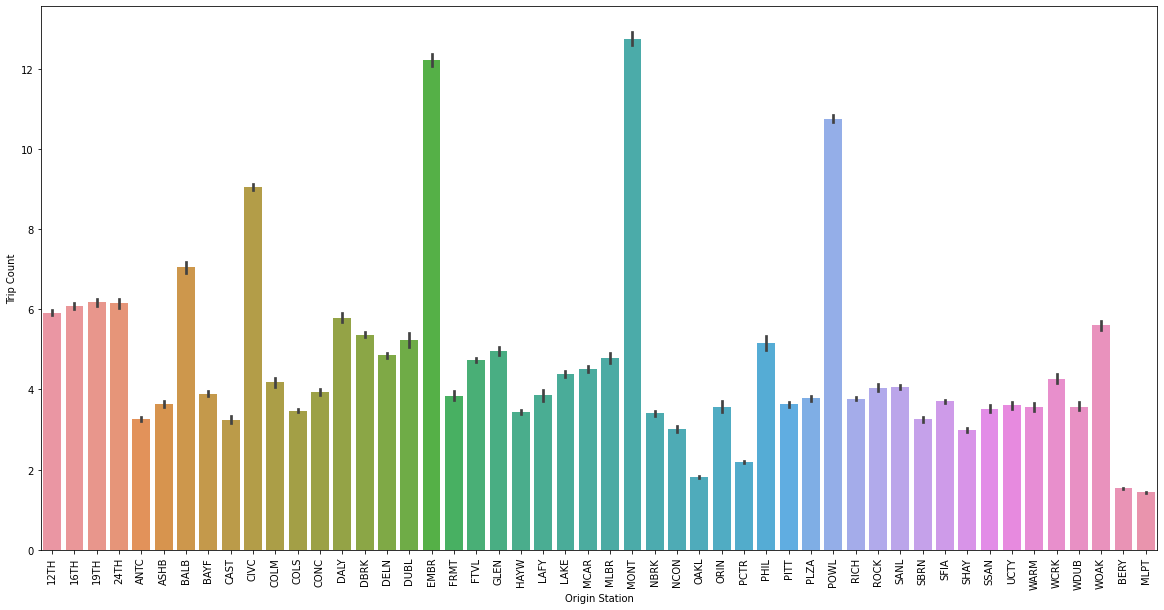

In [24]:
#plt.figure(figsize=(20,10))
#ax=sns.barplot(x=df["Origin Station"],y=df["Trip Count"])
#plt.xticks(rotation=90);

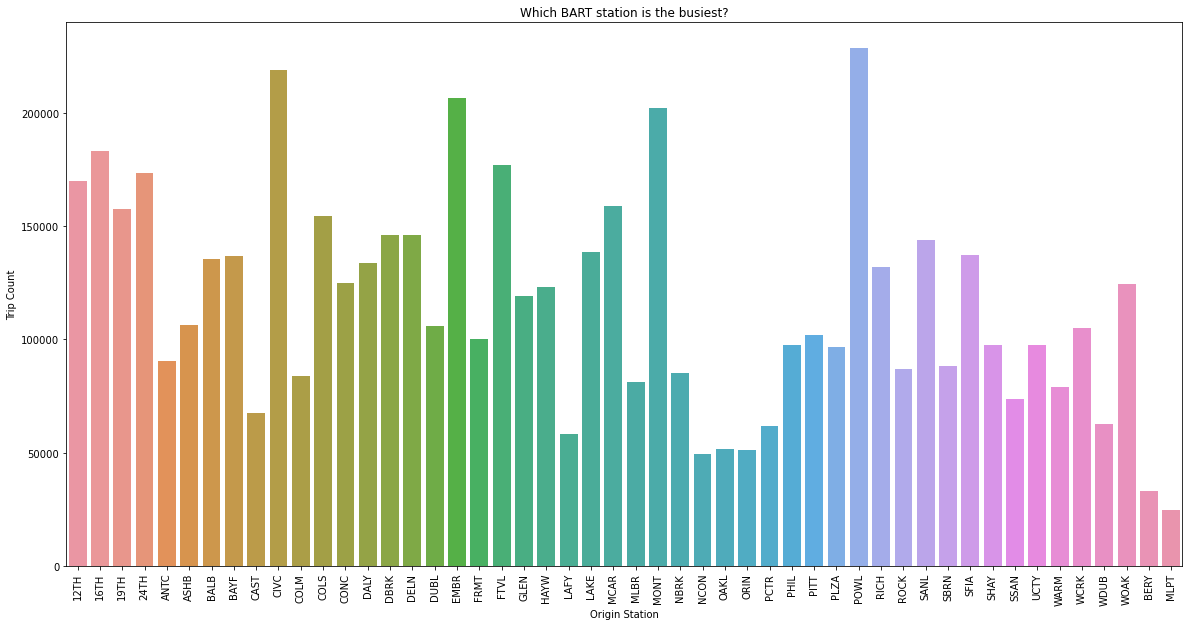

In [25]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df["Origin Station"])
ax.set_title('Which BART station is the busiest?')
ax.set_xlabel("Origin Station")
ax.set_ylabel("Trip Count")
plt.xticks(rotation=90);

Q: Which BART station is the busiest?<br>
**<font color=red>A:</font> <font color=darkblue>Powell Street (POWL) BART station</font> is the busiest BART station with a Trip count of 228578**

**Q: What is the least popular BART route?**

In [26]:
route = df.groupby(["Origin Station","Destination Station"])["Trip Count"].count().sort_values().to_frame()
route

Trip Count
Origin Station Destination Station            
BERY           MLBR                         18
MLPT           ORIN                         18
ORIN           MLPT                         23
MLPT           NCON                         25
NCON           MLPT                         26
...                                        ...
CIVC           BALB                       6035
WOAK           CIVC                       6049
               POWL                       6101
POWL           DALY                       6179
               BALB                       6241

[2500 rows x 1 columns]

we can see that the lowest Trip count is from BERY to MLBR and MLPT to ORIN with 18 Trips

Q: What is the least popular BART route?<br>
**<font color=red>A:</font> <font color=darkblue>Berryessa to Millbrae & Milpitas to Orinda</font> are the least popular BART routes with 18 trips**

**Q: Which day of the week is the busiest?**

In [38]:
df.groupby("Weekday")["Trip Count"].count().sort_values(ascending=False).to_frame()
#df.groupby("Weekday").sum()["Trip Count"].sort_values(ascending=False).to_frame() -- hocam bu satir la üst satir tam olarak farki ne sormak istedim

Trip Count
Weekday              
Thursday       949049
Friday         940766
Wednesday      918486
Tuesday        883843
Monday         870605
Saturday       680457
Sunday         568657

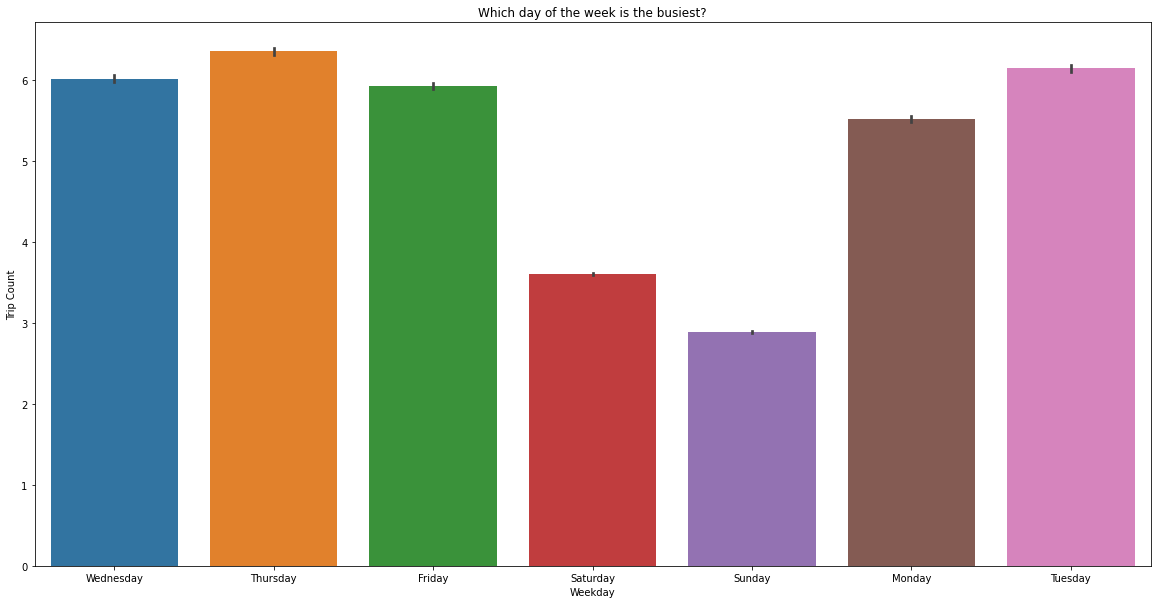

In [28]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x=df["Weekday"],y=df["Trip Count"])
ax.set_title('Which day of the week is the busiest?');

Q: Which day of the week is the busiest?<br>
**<font color=red>A: </font>The busiest day of the week is <font color=darkblue>Thursday</font> with 949049 Trips**

**Q: When is the best time to go to SF from Berkeley if you want to find a seat?**

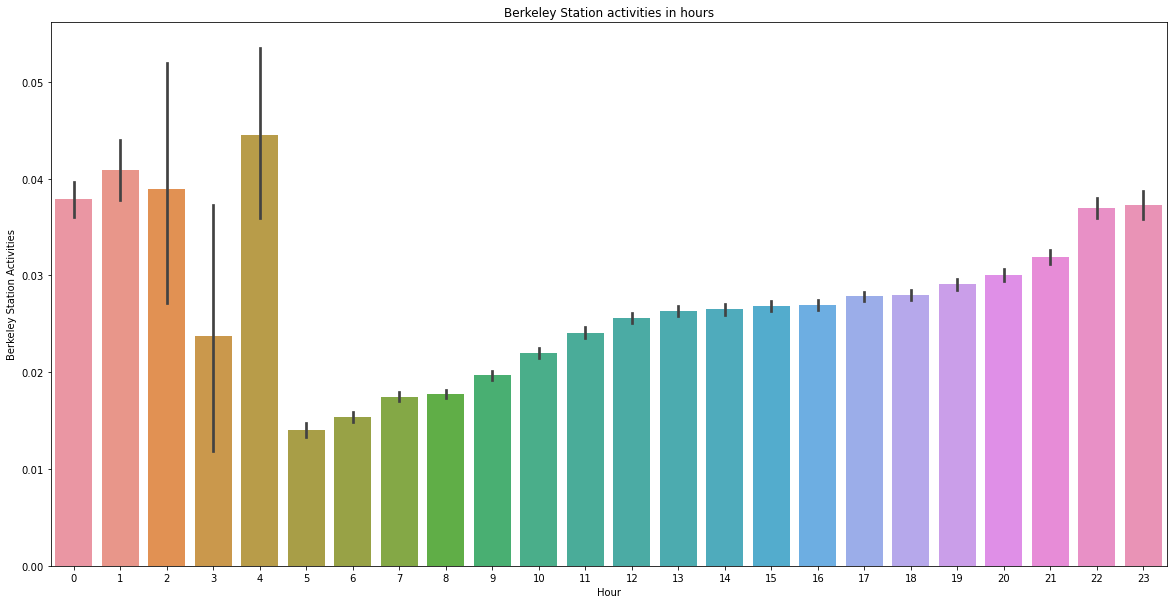

In [29]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x=df["Hour"],y=df["Origin Station"]=="DBRK")
ax.set_title('Berkeley Station activities in hours')
ax.set_xlabel("Hour")
ax.set_ylabel("Berkeley Station Activities");

From this barplot we can see that the Barkeley Station has less activities in the morning time between 5 am to 8 am, so the chances to find a seat would be bigger there

Q: When is the best time to go to SF from Berkeley if you want to find a seat?<br>
**<font color=red>A: </font>The best time would be in the <font color=darkblue>morning</font>, especially between <font color=darkblue>5 am to 8 am</font>, and from the table before we know that sunday is the day with the least activities, followd by saturday</font>**

**Q: How many people take the BART late at night?**

In [41]:
hour_count = df.groupby("Hour")["Trip Count"].count().to_frame()
hour_count

Trip Count
Hour            
0          44605
1          15881
2            847
3            591
4           2225
5         109911
6         264381
7         322412
8         374360
9         359488
10        327401
11        320839
12        323429
13        336420
14        351988
15        372360
16        402478
17        421474
18        399197
19        333925
20        286340
21        239030
22        134074
23         68207

if we assume that latenight is inbetween 0 am and 3 am, the total count of trips in this time space is 61924

In [32]:
latenight = hour_count[:4]
latenight

Trip Count
Hour            
0          44605
1          15881
2            847
3            591

In [33]:
latenight.sum()

Trip Count    61924
dtype: int64

In [34]:
latenight2=latenight.sum() + hour_count[-1:].sum()
latenight2

Trip Count    130131
dtype: int64

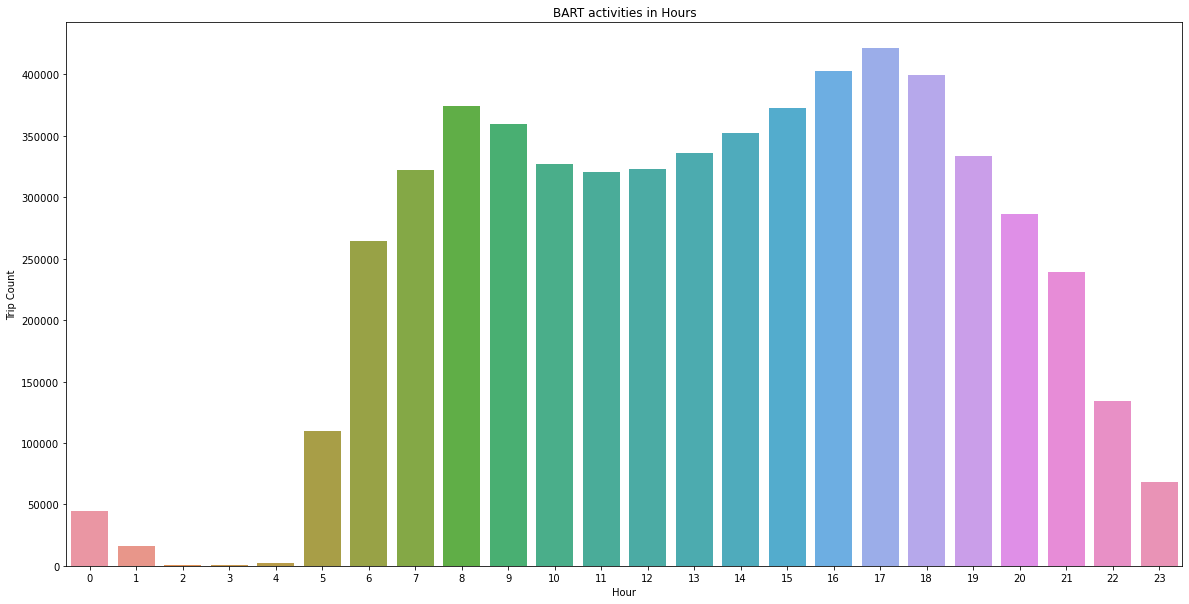

In [35]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df["Hour"])
ax.set_title('BART activities in Hours')
ax.set_xlabel("Hour")
ax.set_ylabel("Trip Count");

Q: How many people take the BART late at night?<br>
**<font color=red>A:</font> If we take 0 am to 3 am as late nightm there are <font color=darkblue>61924 Trips</font> inbetween these times<br>
and if we also take 23 pm it's up to <font color=darkblue>130131 Trips</font> in latenight**

In [36]:
# I tried to google define latenight time and I found on some Page 0am - 3am

More infos about Bart

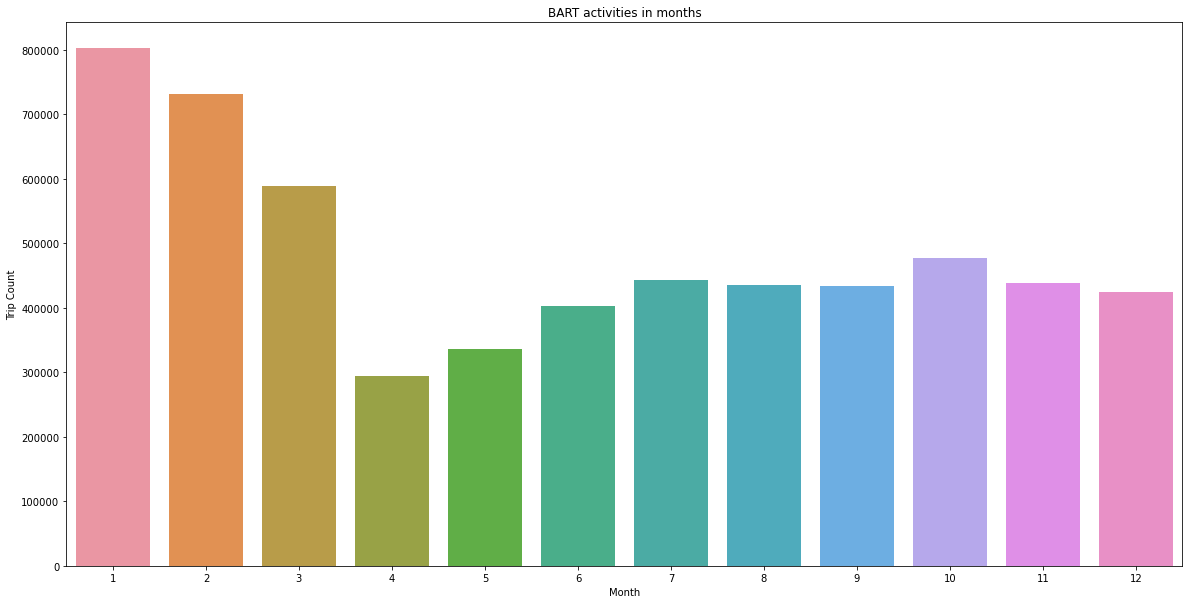

In [42]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x=df["Month"])
ax.set_title('BART activities in months')
ax.set_xlabel("Month")
ax.set_ylabel("Trip Count");

Bart Activities in months:
* least activity in April: Tax Day has typically fallen on or just after April 15, Tax Day is the day on which individual income tax returns are due to be submitted to the federal government
* most activity in January: New Year Resolution, more people could be more motivated to go outside and fullfill their dreams like going to the gym or start new hobbies

In [48]:
import plotly.express as px

In [51]:
df['Route'] = df[['Origin Station', 'Destination Station']].apply(lambda x: '-'.join(x), axis=1)

In [54]:
df.sample(2)

Hour Origin Station Destination Station  Trip Count  Year  Month  \
5139434    10           MONT                EMBR           2  2020     11   
3223700     5           12TH                WOAK           2  2020      7   

         Day Weekday      Route  
5139434   13  Friday  MONT-EMBR  
3223700    6  Monday  12TH-WOAK

In [53]:
idx = df.groupby(['Hour'])['Trip Count'].transform(max) == df['Trip Count']
fig = px.bar(df[idx], x='Hour', y='Trip Count', hover_name = 'Route', color='Route', title = 'Most Travelled Routes each Hour')
fig.show()

In [150]:
# I just saw that in the last lines it says merge teh data from 2016 and 2017, I just started right away with only 2020..

<font color=darkgreen>
<h3>Data Science Questions</h3></font>

**Question A: Compute the straight line distance between every station**

In [92]:
df_coords=pd.read_csv("station_coords.csv").drop(["Unnamed: 0","Unnamed: 1"], axis=1)
df_coords.sample(5)

station_name  latitute  longitude
10         BALB       318       1052
39         ANTC      1855        187
13         SSAN       342       1200
44         ASHB       765        537
22         BAYF      1075       1105

In [93]:
df_coords.columns=["Origin Station","o_latitute","o_longitude"]

In [94]:
df=pd.merge(df,df_coords)

In [95]:
df_coords.columns=["Destination Station","d_latitute","d_longitude"]

In [96]:
df=pd.merge(df,station_coords)

In [97]:
df.sample(2)

Hour Origin Station Destination Station  Trip Count  Year  Month  \
2933518    15           GLEN                RICH           2  2020      9   
3033503    14           COLM                SANL           1  2020      1   

         Day   Weekday      Route  o_latitute  o_longitude  d_latitute  \
2933518   24  Thursday  GLEN-RICH         339         1023         611   
3033503   18  Saturday  COLM-SANL         301         1154        1025   

         d_longitude  
2933518          310  
3033503         1045

In [98]:
df=df.drop_duplicates()

In [101]:
df.shape

(5811863, 13)

In [99]:
R = 6373.0 #km cinsinden yaklaşık dünyanın yarıçapı

In [102]:
from math import sin, cos, sqrt, atan2
import math

In [103]:
lat1=df["o_latitute"]
lon1=df["o_longitude"]
lat2=df["d_latitute"]
lon2=df["d_longitude"]

dlon=(lon2-lon1).astype(float)
dlat=(lat2-lat1).astype(float)

a=np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c
df["distance"]=distance

In [104]:
df_distance_table=df[["Origin Station","Destination Station","distance"]].drop_duplicates().reset_index(drop=True)

In [105]:
df_distance_table=df_distance_table[df_distance_table["distance"]!=0]

In [106]:
import networkx as nx
df_distance_table=nx.from_pandas_edgelist(df,source="Origin Station",target="Destination Station",edge_attr=True)

In [107]:
df_distance_table.nodes()

NodeView(('12TH', '16TH', '19TH', '24TH', 'ANTC', 'ASHB', 'BALB', 'BAYF', 'CAST', 'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL', 'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR', 'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PCTR', 'PHIL', 'PITT', 'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY', 'SSAN', 'UCTY', 'WARM', 'WCRK', 'WDUB', 'WOAK', 'BERY', 'MLPT'))

In [108]:
df_distance_table.edges()

EdgeView([('12TH', '16TH'), ('12TH', '24TH'), ('12TH', 'ASHB'), ('12TH', 'BAYF'), ('12TH', 'CIVC'), ('12TH', 'COLS'), ('12TH', 'DALY'), ('12TH', 'DBRK'), ('12TH', 'DELN'), ('12TH', 'EMBR'), ('12TH', 'FRMT'), ('12TH', 'FTVL'), ('12TH', 'HAYW'), ('12TH', 'LAFY'), ('12TH', 'MCAR'), ('12TH', 'MONT'), ('12TH', 'PHIL'), ('12TH', 'PLZA'), ('12TH', 'POWL'), ('12TH', 'RICH'), ('12TH', 'SANL'), ('12TH', 'SBRN'), ('12TH', 'WCRK'), ('12TH', '12TH'), ('12TH', '19TH'), ('12TH', 'ANTC'), ('12TH', 'BALB'), ('12TH', 'CAST'), ('12TH', 'COLM'), ('12TH', 'CONC'), ('12TH', 'DUBL'), ('12TH', 'GLEN'), ('12TH', 'LAKE'), ('12TH', 'MLBR'), ('12TH', 'NBRK'), ('12TH', 'NCON'), ('12TH', 'OAKL'), ('12TH', 'ORIN'), ('12TH', 'PCTR'), ('12TH', 'PITT'), ('12TH', 'ROCK'), ('12TH', 'SFIA'), ('12TH', 'SHAY'), ('12TH', 'SSAN'), ('12TH', 'UCTY'), ('12TH', 'WARM'), ('12TH', 'WDUB'), ('12TH', 'WOAK'), ('12TH', 'BERY'), ('12TH', 'MLPT'), ('16TH', '16TH'), ('16TH', '19TH'), ('16TH', '24TH'), ('16TH', 'ANTC'), ('16TH', 'ASHB'), 

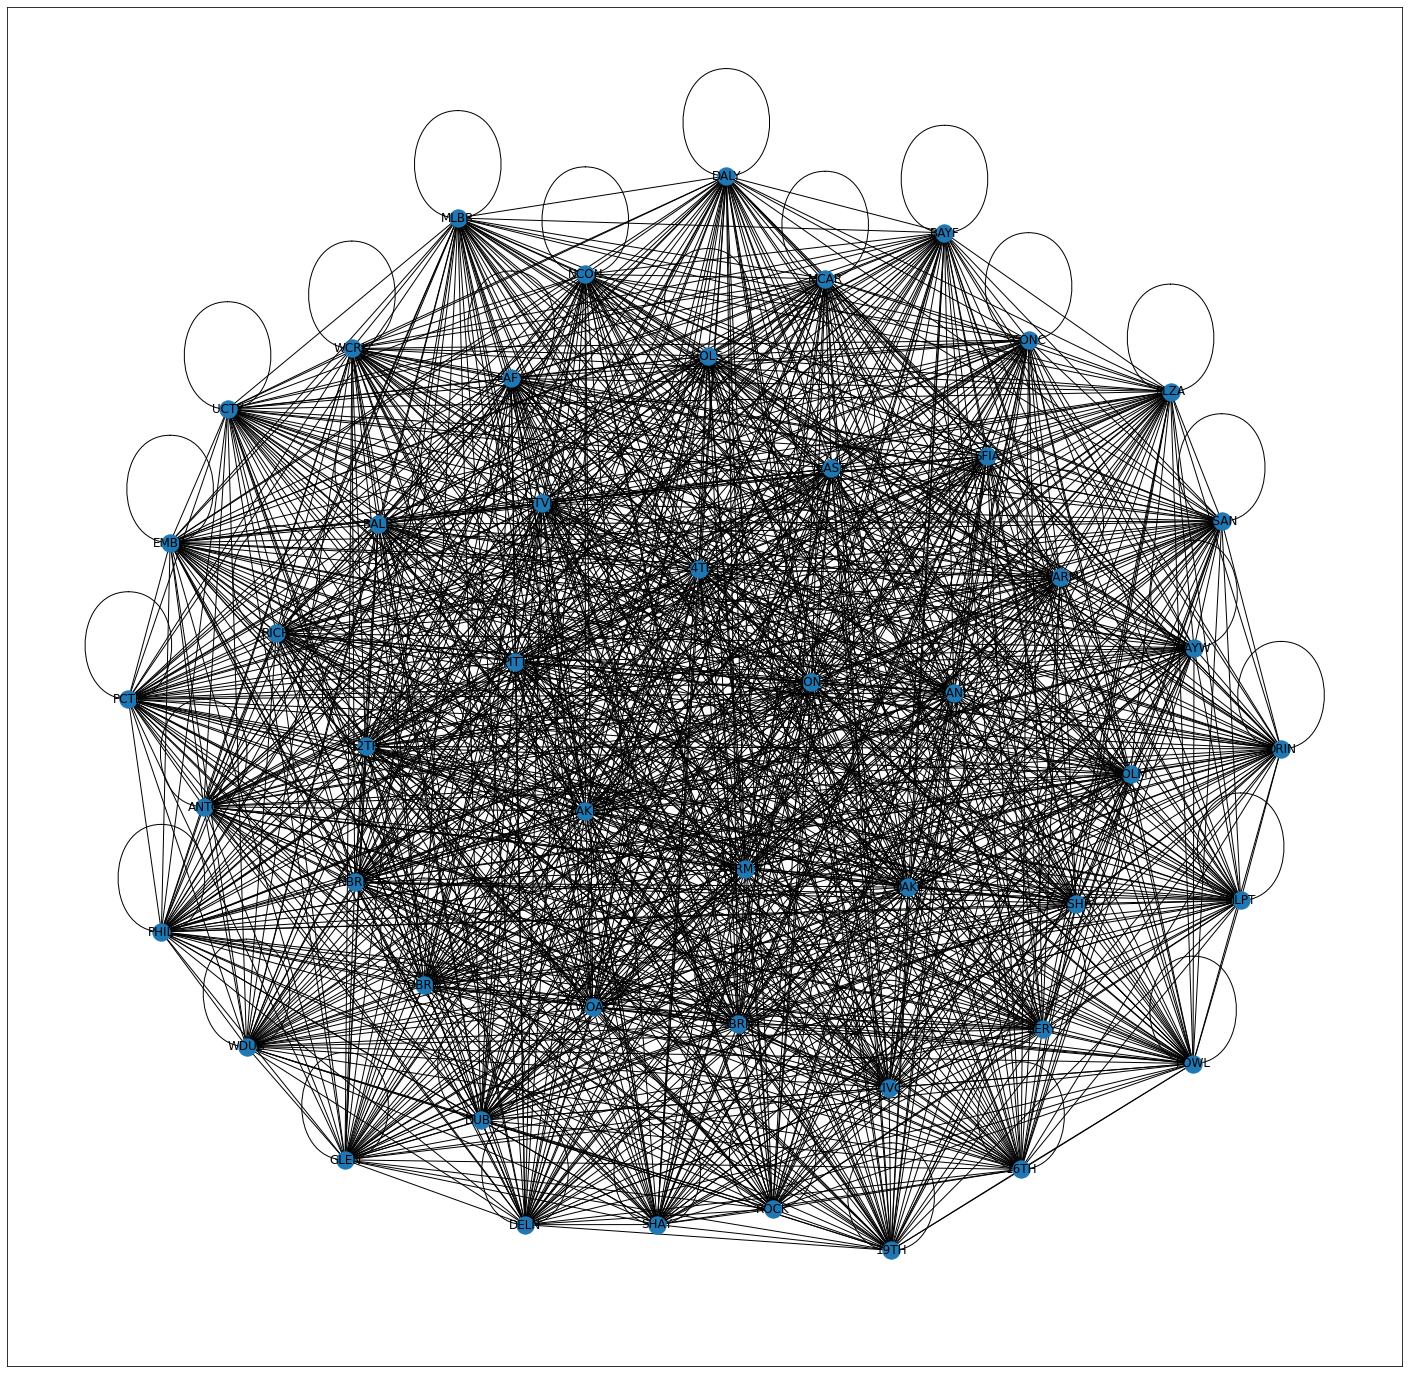

In [109]:
plt.figure(figsize=(25,25))
nx.draw_networkx(df_distance_table,with_labels=True)

**Question B: Build a model that can predicted the number of people commuting to work by Bart between any 2 stations:<br>
How would you approach that?**

By Using <font color=purple>Regression</font>, building a model, fit and predict the model to get the answer

In [111]:
df.sample(3)

Hour Origin Station Destination Station  Trip Count  Year  Month  \
3616163    19           SBRN                BALB           4  2020      7   
5416638    15           RICH                19TH           4  2020      3   
909929     15           MONT                COLS          34  2020      1   

         Day   Weekday      Route  o_latitute  o_longitude  d_latitute  \
3616163    7   Tuesday  SBRN-BALB         380         1270         318   
5416638    3   Tuesday  RICH-19TH         611          310         798   
909929     2  Thursday  MONT-COLS         438          860         959   

         d_longitude      distance  
3616163         1052  12212.474330  
5416638          655   9572.053494  
909929           983   6283.067216

In [112]:
df=df.drop(["o_latitute","o_longitude","d_latitute","d_longitude"],axis=1)

In [113]:
df.sample(3)

Hour Origin Station Destination Station  Trip Count  Year  Month  \
2819277    11           SANL                POWL           2  2020      6   
2707224     0           DALY                POWL           2  2020      1   
1670561     9           MONT                FRMT           2  2020      3   

         Day    Weekday      Route      distance  
2819277   10  Wednesday  SANL-POWL  14080.658412  
2707224    4   Saturday  DALY-POWL   5925.063328  
1670561   18  Wednesday  MONT-FRMT   6426.641582

In [114]:
df2=df

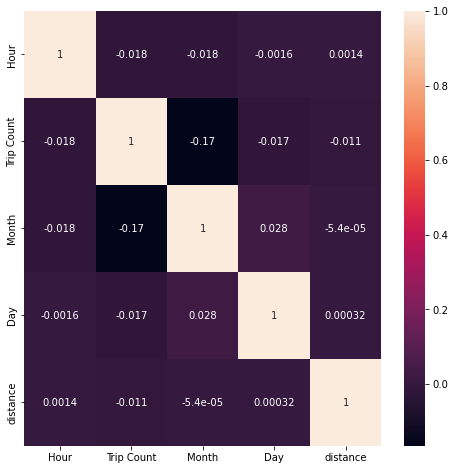

In [123]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [115]:
abs(df2.corr()["Trip Count"].sort_values(ascending=False))

Trip Count    1.000000
distance      0.010625
Day           0.016879
Hour          0.017611
Month         0.165873
Year               NaN
Name: Trip Count, dtype: float64

In [116]:
df2.drop(["Origin Station","Destination Station","Year","Route","Weekday"],axis=1,inplace=True)

In [117]:
df2.sample(3)

Hour  Trip Count  Month  Day      distance
1600067    11           2     12   23   8444.670405
477605     15           2      9   24  13791.199212
3652422    13           5     10   17  16095.246063

In [119]:
x=df2.drop("Trip Count", axis=1)
y=df2[["Trip Count"]]

In [120]:
x.shape, y.shape

((5811863, 4), (5811863, 1))

In [121]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    
    return result.sort_values('R_Squared',ascending=False)

In [122]:
regression_funct(x,y)

R_Squared       RMSE       MAE
KNeighborsRegressor         0.285107  15.363553  4.044681
GradientBoostingRegressor   0.100921  17.229405  5.220364
LinearRegression            0.028433  17.910496  5.777509
Ridge                       0.028433  17.910496  5.777509
ElasticNet                  0.028154  17.913074  5.706697
Lasso                       0.027950  17.914948  5.696642
ExtraTreeRegressor         -0.573138  22.790544  5.723527

**What additional data would you need?**

The task was to build a model that predicts number of people using BART. But the problem here is that we dont have the data of passengers using BART. This is why this model has such a low score.

**How would you want the city or Bart officials to use your data?**

With this data you can see fo example the activies in each station due to month and day times. With this information the officials could try to reshape the Trip counts, so that in rush hours more trains are availible and in less active time they could save up.

In [ ]:
#Try with deep learn

In [124]:
#!pip install tensorflow

In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.model_selection import train_test_split

In [139]:
x=df2.drop("Trip Count", axis=1)
y=df2[["Trip Count"]]

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [141]:
model=Sequential()
model.add(Dense(200,activation='relu')) #Dense bütün nüronlar birbirne baglandi demek
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1)) # regression oldugu icin sigmoid yok
model.compile(optimizer="adam",loss="mse") #regression'da loss mse

In [142]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=20)
model.summary()

Epoch 1/20
36325/36325 [==============================] - 152s 4ms/step - loss: 335.5237 - val_loss: 330.1073
Epoch 2/20
36325/36325 [==============================] - 147s 4ms/step - loss: 327.6814 - val_loss: 329.9181
Epoch 3/20
36325/36325 [==============================] - 147s 4ms/step - loss: 327.6373 - val_loss: 329.9634
Epoch 4/20
36325/36325 [==============================] - 147s 4ms/step - loss: 327.8589 - val_loss: 329.9094
Epoch 5/20
36325/36325 [==============================] - 147s 4ms/step - loss: 327.8952 - val_loss: 329.9338
Epoch 6/20
36325/36325 [==============================] - 146s 4ms/step - loss: 329.4738 - val_loss: 329.9120
Epoch 7/20
36325/36325 [==============================] - 147s 4ms/step - loss: 327.7603 - val_loss: 329.9093
Epoch 8/20
36325/36325 [==============================] - 151s 4ms/step - loss: 328.0328 - val_loss: 329.9290
Epoch 9/20
36325/36325 [==============================] - 148s 4ms/step - loss: 327.6562 - val_loss: 329.9072
Epoch 10/2

In [143]:
loss_df=pd.DataFrame(model.history.history)

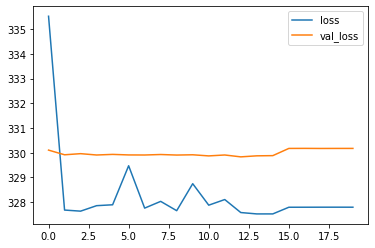

In [144]:
loss_df.plot();

In [145]:
tahmin=model.predict(x)

181621/181621 [==============================] - 188s 1ms/step


In [146]:
from sklearn.metrics import mean_squared_error, r2_score

In [147]:
r2_score(tahmin,y)

-153444570340.6641

In [148]:
(mean_squared_error(tahmin,y))**0.5

18.118305911318

In [ ]:
#well.. I don't know what happened here.. and I waited an hour for this..